In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("/content/real_estate.csv")

In [64]:
df.shape

(1460, 161)

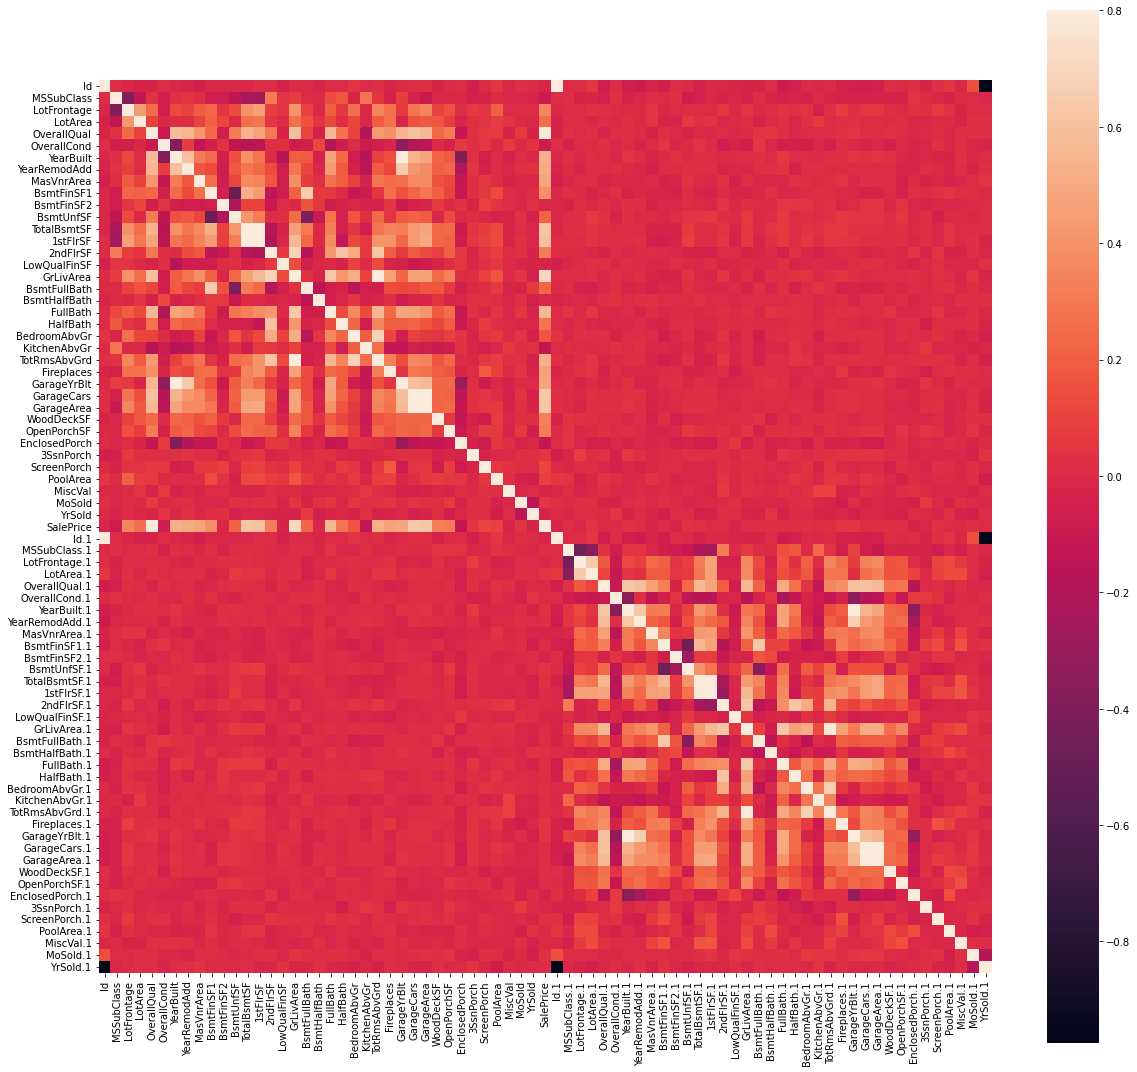

In [68]:
NewMat = df.corr()
f, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(NewMat, vmax=.8, square=True);

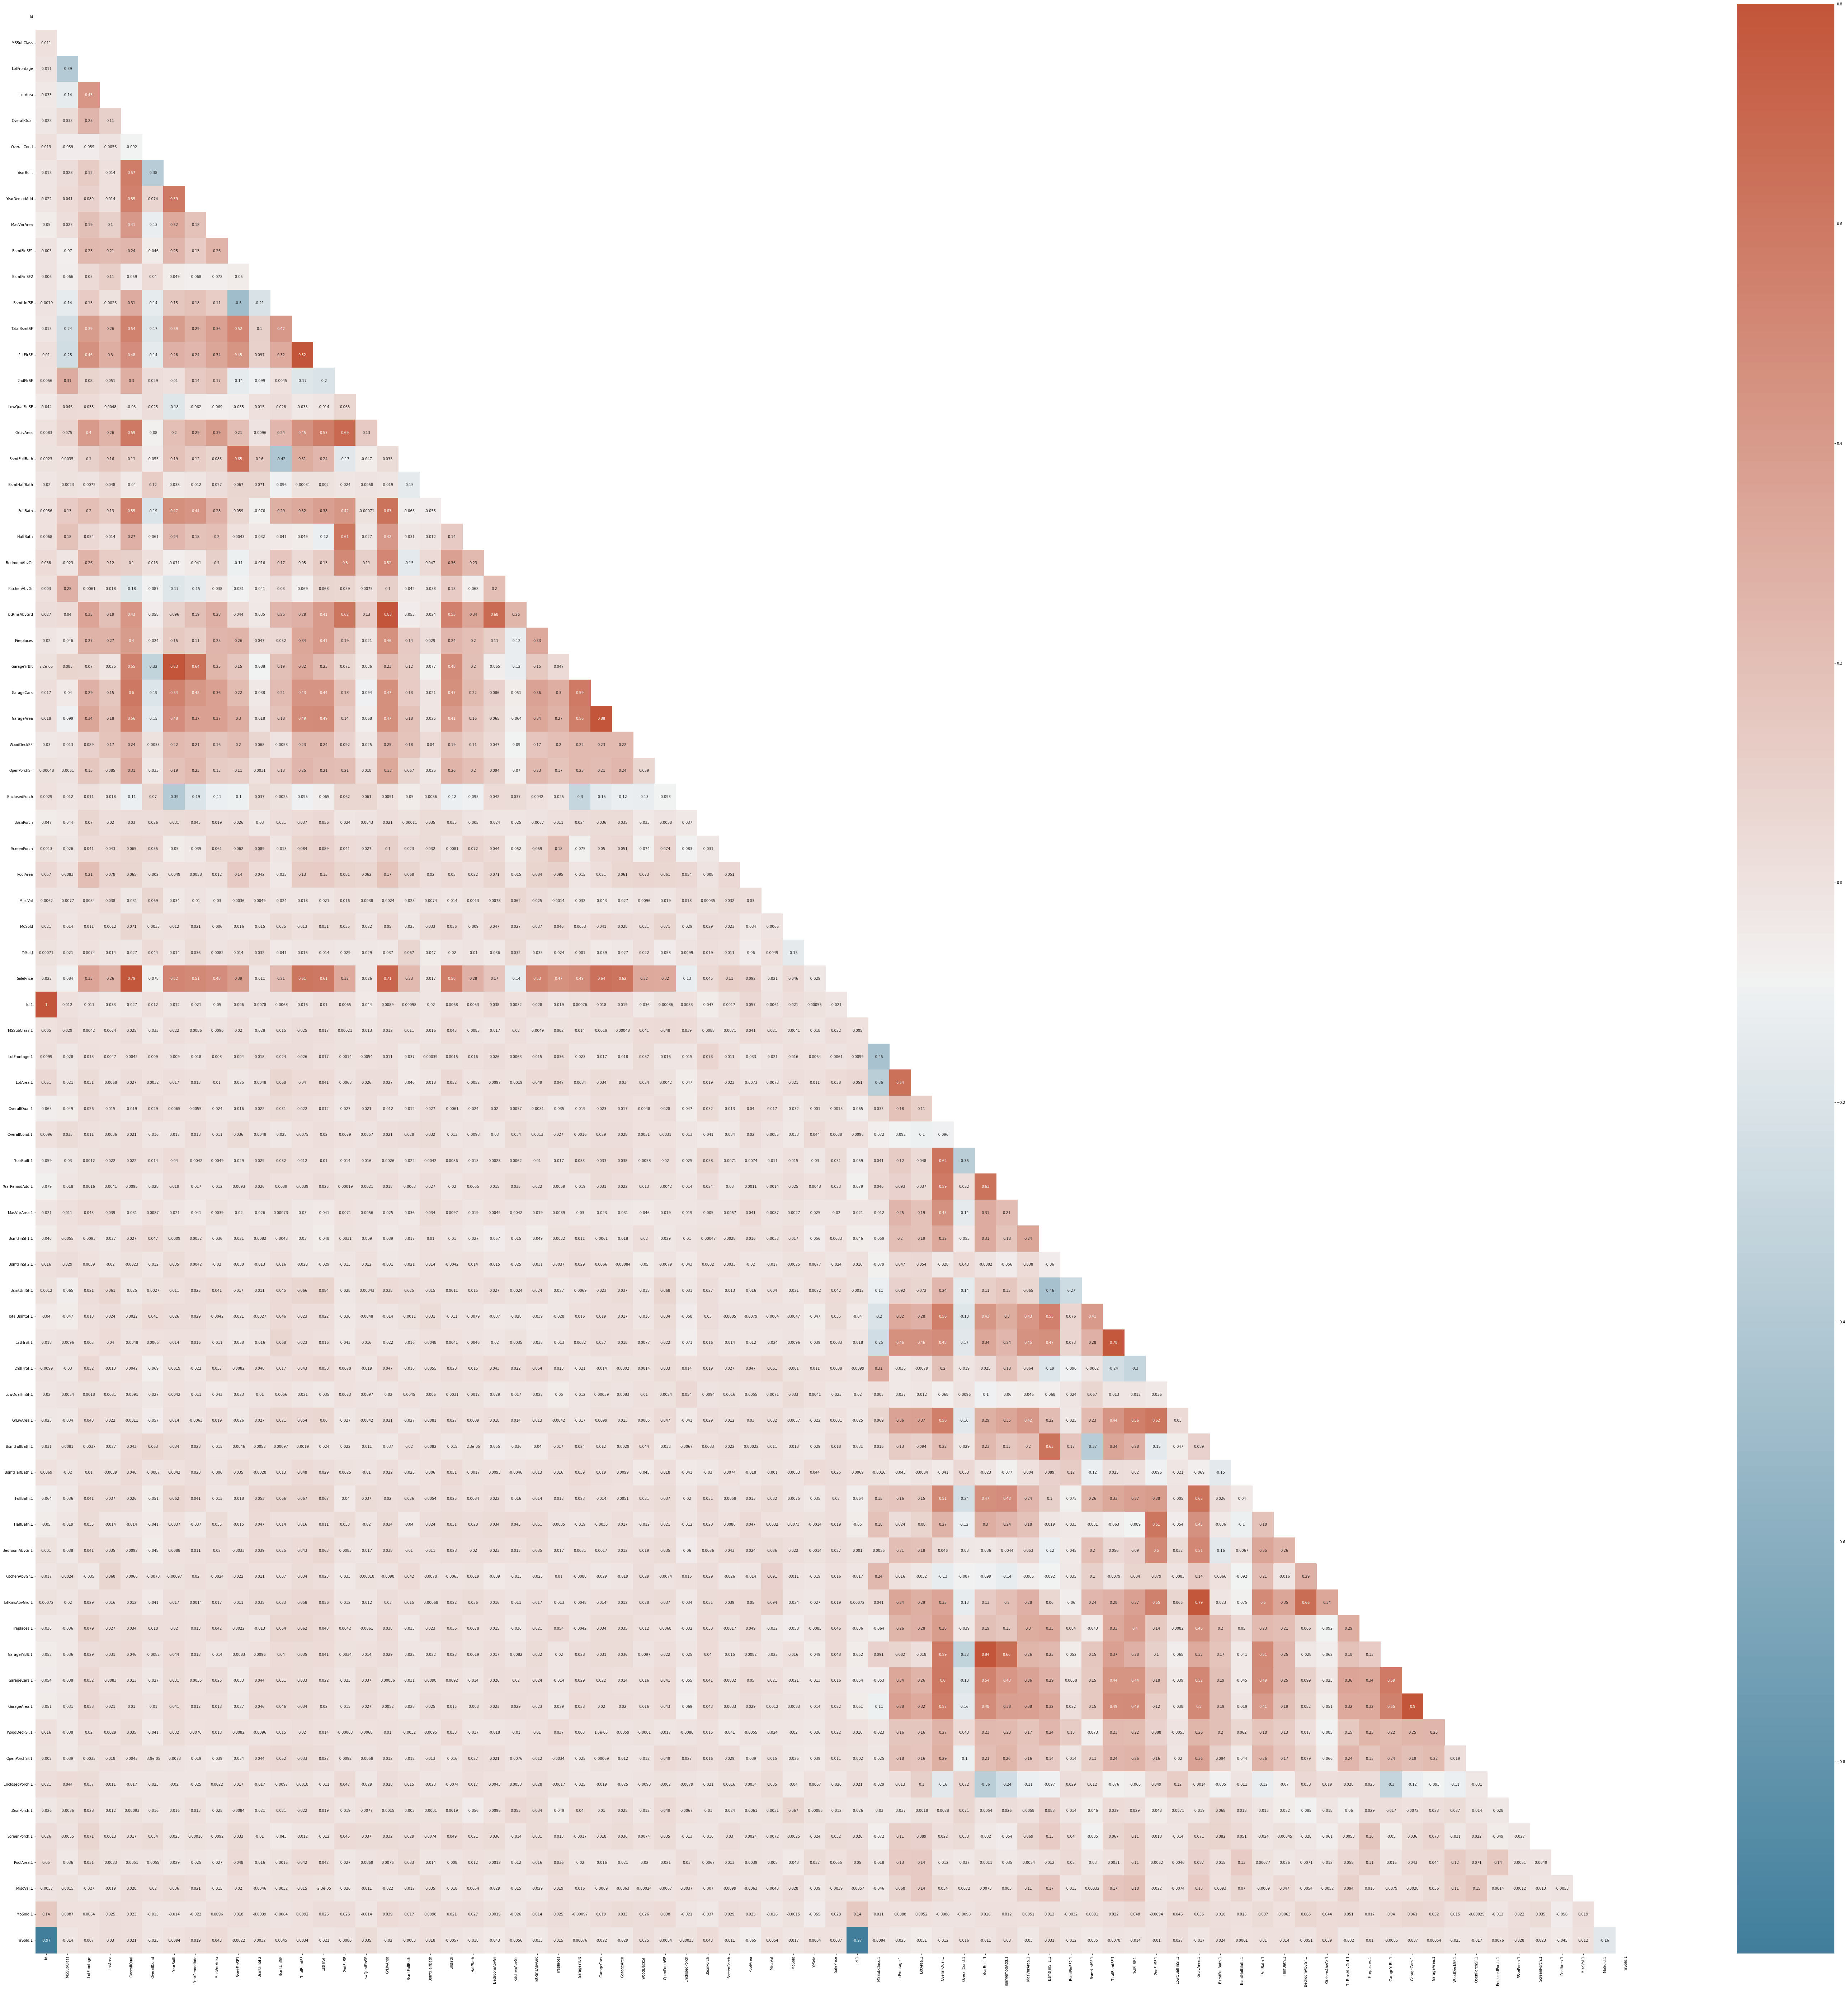

In [71]:

f, ax = plt.subplots(figsize=(100, 100))


# cmap refers to the custom diverging colormap
sns.heatmap(df.corr(),vmax=0.8,  annot=True, mask =np.triu(np.ones_like(df.corr(), dtype=bool)), cmap =sns.diverging_palette(230, 20, as_cmap=True))


In [74]:
cols = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea',
'1stFlrSF', '2ndFlrSF','GrLivArea','BsmtFullBath',
'BedroomAbvGr', 'GarageYrBlt', 'WoodDeckSF','SalePrice']
df = df[cols]

In [75]:
df.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'GarageYrBlt',
       'WoodDeckSF', 'SalePrice'],
      dtype='object')

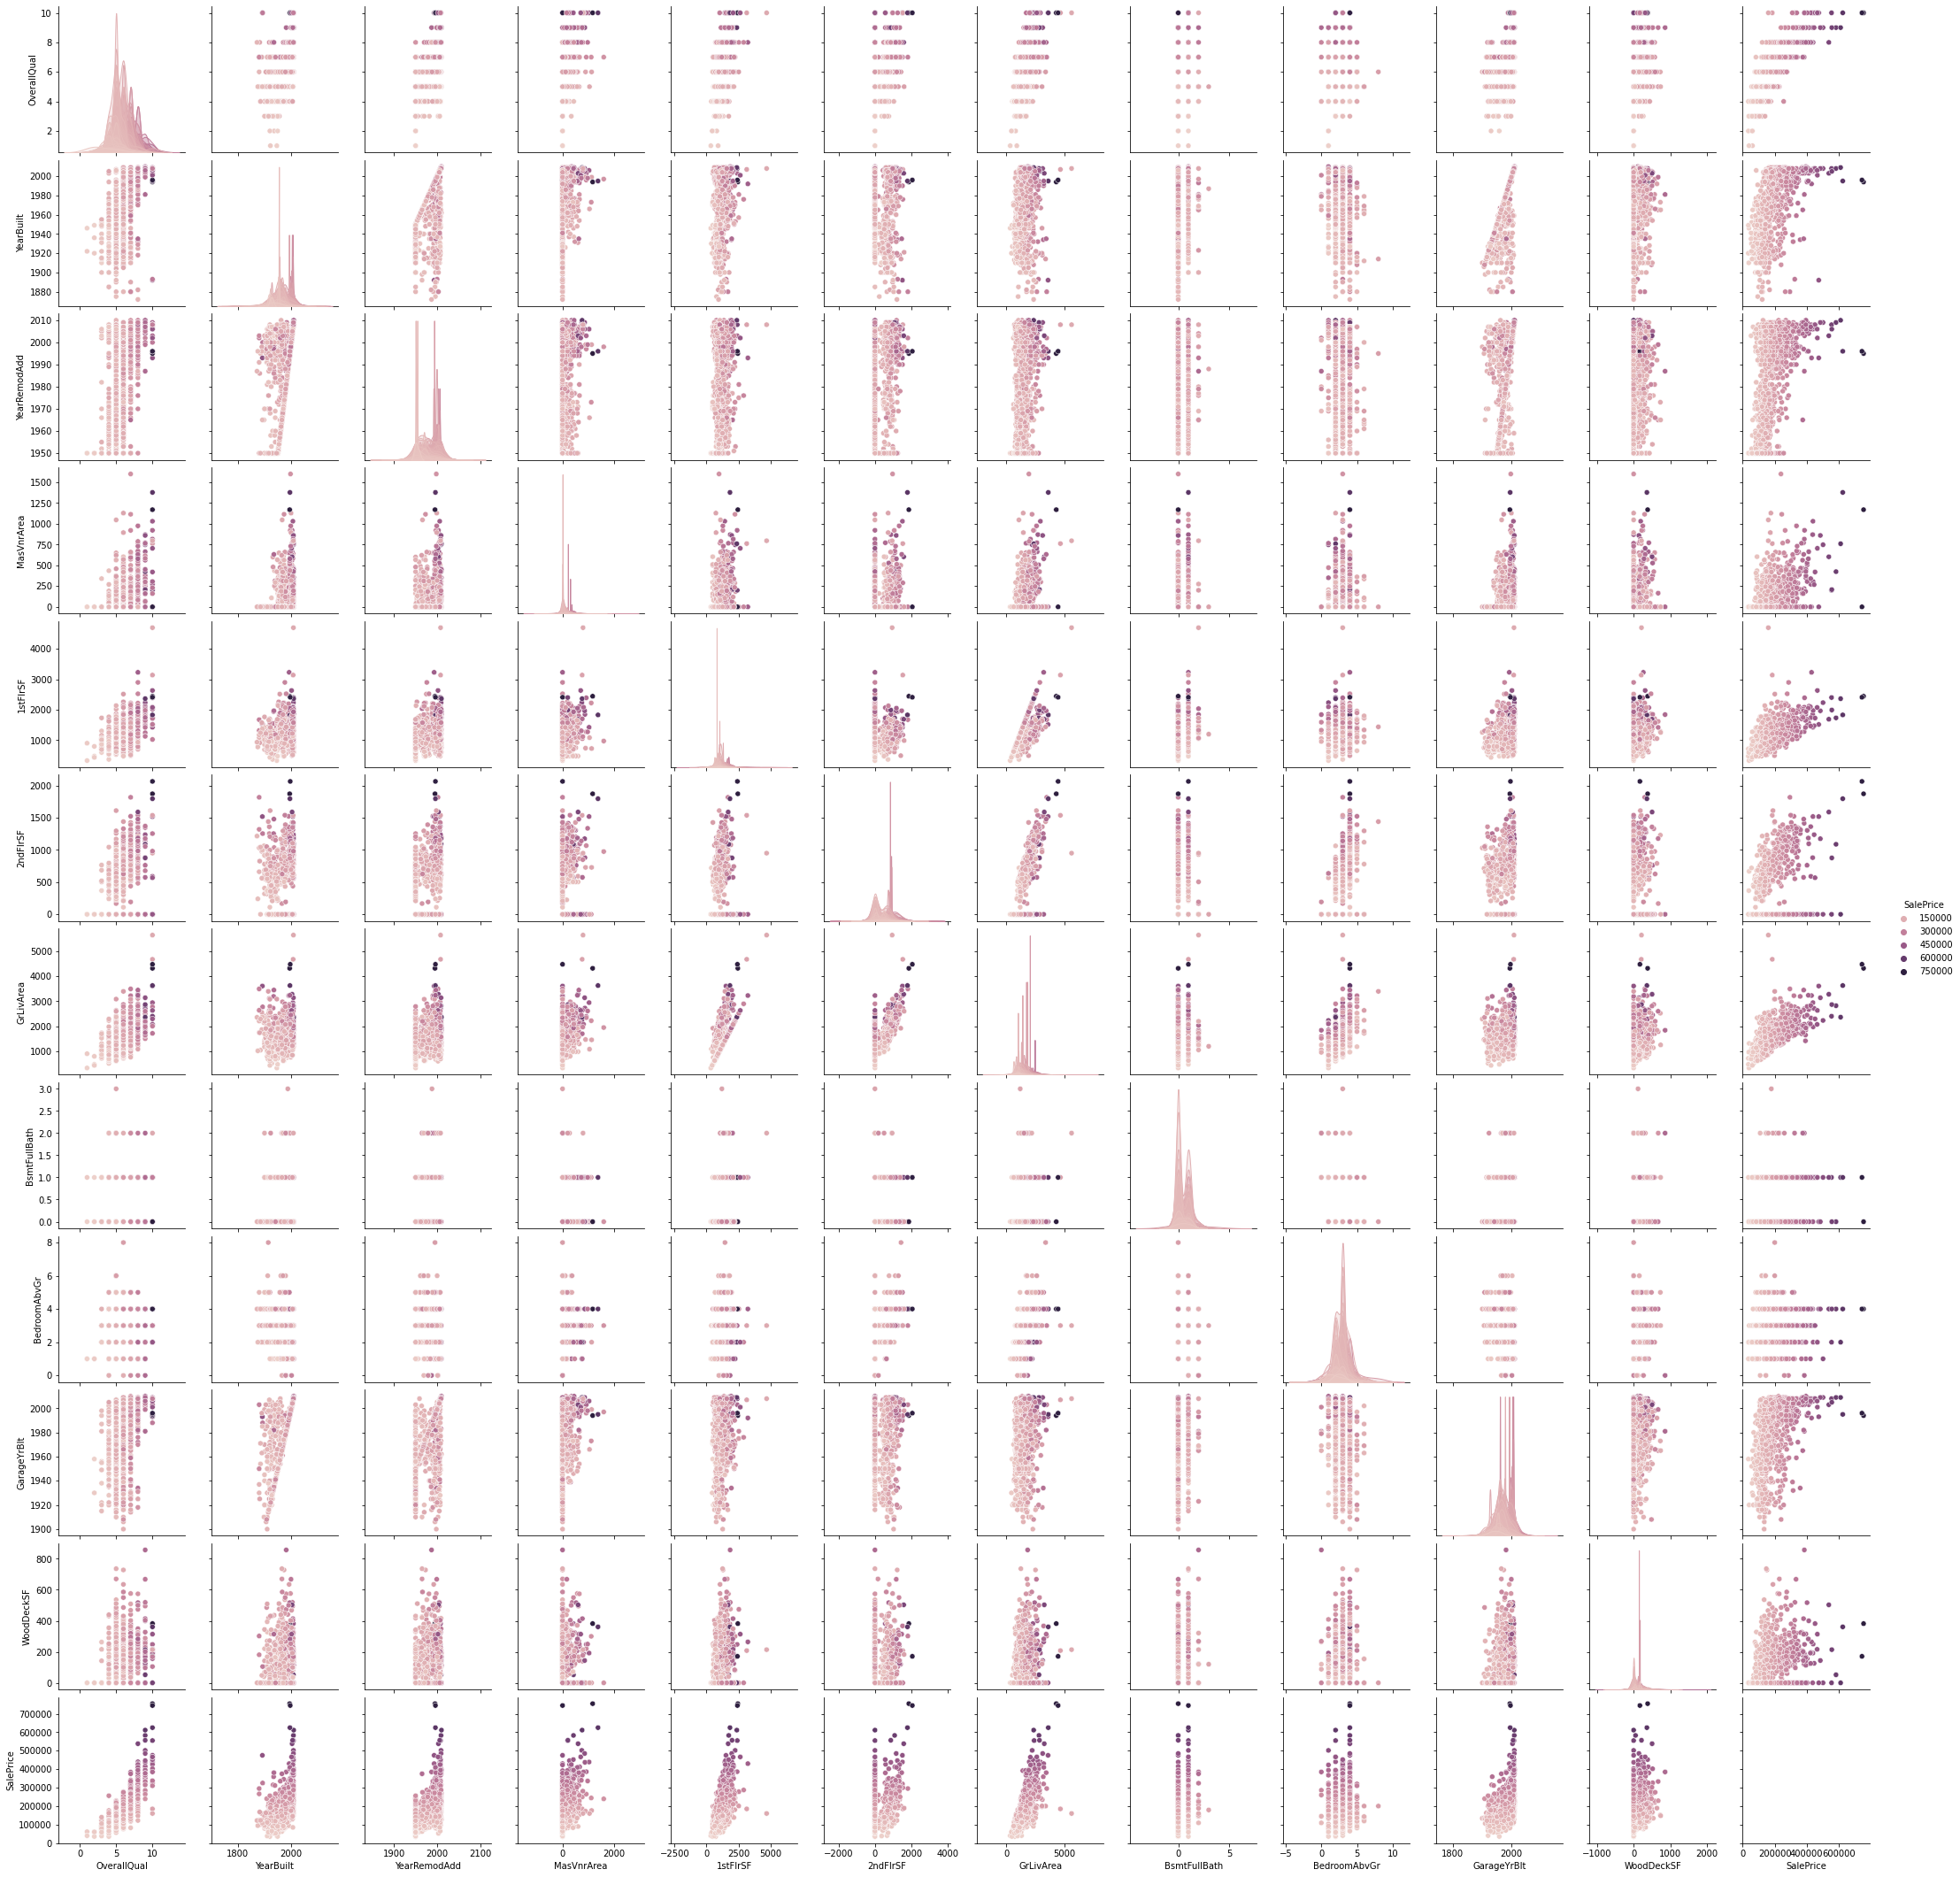

In [91]:
sns.pairplot(df,vars=df.columns,hue="SalePrice")

In [98]:
# Looking at outliers

In [96]:
for i in df.columns:
  print([i, df[i].skew()])

['OverallQual', 0.2169439277628693]
['YearBuilt', -0.613461172488183]
['YearRemodAdd', -0.5035620027004709]
['MasVnrArea', 2.669084210182863]
['1stFlrSF', 1.3767566220336365]
['2ndFlrSF', 0.8130298163023265]
['GrLivArea', 1.3665603560164552]
['BsmtFullBath', 0.596066609663168]
['BedroomAbvGr', 0.21179009627507137]
['GarageYrBlt', -0.6494146238714679]
['WoodDeckSF', 1.5413757571931312]
['SalePrice', 1.8828757597682129]


In [97]:
# From the above stat it is obvious that none of the features are normally distributed
# We can not apply z-score method to remove outliers

In [101]:
def drawBoxPlot(i):
  sns.boxplot(df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


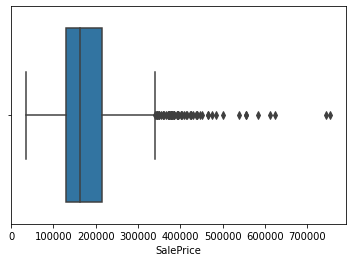

In [108]:
drawBoxPlot('SalePrice')

In [109]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [117]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3-Q1
min_value_allowed = Q1-1.5*IQR
max_value_allowed = Q3+1.5*IQR


In [118]:
df['SalePrice'] = np.where(df['SalePrice']>max_value_allowed, max_value_allowed, np.where(df['SalePrice']<min_value_allowed, min_value_allowed, df['SalePrice']))

In [119]:
df['SalePrice'].describe()

count      1460.000000
mean     177331.526370
std       67205.835915
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      340037.500000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


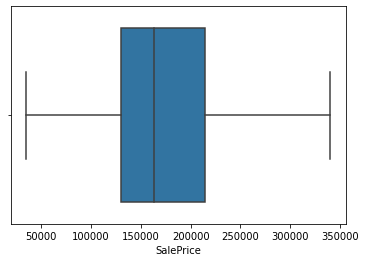

In [120]:
sns.boxplot(df['SalePrice'])

In [122]:
(df.isnull().mean())*100

OverallQual     0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
MasVnrArea      0.547945
1stFlrSF        0.000000
2ndFlrSF        0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BedroomAbvGr    0.000000
GarageYrBlt     5.547945
WoodDeckSF      0.000000
SalePrice       0.000000
dtype: float64

In [123]:
X = df.drop(columns=['SalePrice'])

In [124]:
Y = df['SalePrice']

In [125]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [126]:
from sklearn.impute import KNNImputer

In [127]:
knn = KNNImputer()
x_train_trf = knn.fit_transform(x_train)
x_test_trf = knn.transform(x_test)


In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae, r2_score, 


In [134]:
def getMetrics(n):
  myTreeModel = DecisionTreeRegressor(max_leaf_nodes=n)
  myTreeModel.fit(x_train_trf,y_train)
  absolute_err = mae(y_test,myTreeModel.predict(x_test_trf))
  #r2_value = r2_score(y_test,myTreeModel.predict(x_test_trf)) 
  #return([absolute_err,r2_value])
  return absolute_err

In [139]:
for leaves in [5,50,100,250,500,5000,10000]:
  print(getMetrics(leaves))


33886.59386703973
25130.29454728801
24704.406135742473
25070.653265850804
25952.180227941284
28413.342465753423
27090.49315068493


In [140]:
from sklearn.ensemble import RandomForestRegressor
myRandomTree = RandomForestRegressor()
myRandomTree.fit(x_train_trf, y_train)
print(mae(y_test, myRandomTree.predict(x_test_trf)))

19927.68849885845
